In [1]:
from typing import Sequence
import numpy as np
import pandas as pd
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2025-04-20 08:47:51.098033: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745138871.564371      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745138871.694634      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
X = []
y = []
seq_length = 20

### Combine all NonViolence CSV's

In [3]:
nonviolence_dfs = [
    pd.read_csv("/kaggle/input/sarthak-avipriya-6000-combined-pose/nonviolence_landmarks_1500_sarthak.csv"),
    pd.read_csv("/kaggle/input/sarthak-avipriya-6000-combined-pose/nonviolence_landmarks_1500_avipriya.csv"),
    pd.read_csv("/kaggle/input/new-dataset/nonviolence_landmarks_1500.csv"),
    pd.read_csv("/kaggle/input/new-dataset/nonviolence_new_landmarks_1500.csv"),
    pd.read_csv("/kaggle/input/additional/nonviolence_new_Latest_landmarks_1500.csv"),
    pd.read_csv("/kaggle/input/single-new2/nonviolence_new_Latest_single_landmarks_1500.csv")
]
nonviolence_df = pd.concat(nonviolence_dfs, ignore_index=True)

### Combine all Violence CSV's

In [4]:
violence_dfs = [
    pd.read_csv("/kaggle/input/sarthak-avipriya-6000-combined-pose/violence_landmarks_1500_sarthak.csv"),
    pd.read_csv("/kaggle/input/sarthak-avipriya-6000-combined-pose/violence_landmarks_1500_avipriya.csv"),
    pd.read_csv("/kaggle/input/new-dataset/violence_landmarks_1500.csv"),
    pd.read_csv("/kaggle/input/new-dataset/violence_new_landmarks_1500.csv"),
    pd.read_csv("/kaggle/input/violence-dataset-extra/violence_landmarks_1500_avipriya.csv")
]

violence_df = pd.concat(violence_dfs, ignore_index=True)

In [ ]:
nonviolence_df.to_csv("nonviolence_combined_front.csv", index=False)
violence_df.to_csv("violence_combined_front.csv", index=False)

In [5]:
datasets = nonviolence_df.values
n_samples = len(datasets)
for i in range(seq_length, n_samples):
    X.append(datasets[i-seq_length:i, :])
    y.append(0)

datasets = violence_df.values
n_samples = len(datasets)
for i in range(seq_length, n_samples):
    X.append(datasets[i-seq_length:i, :])
    y.append(1)

In [6]:
X, y = np.array(X), np.array(y)
print(X.shape, y.shape)

(17960, 20, 132) (17960,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
X.shape[1], X.shape[2]

(20, 132)

In [9]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=2, activation="softmax"))  

model.compile(optimizer="adam", metrics=["accuracy"], loss="sparse_categorical_crossentropy")

I0000 00:00:1745138892.485092      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1745138892.485938      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 50)              │          36,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 20, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 20, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97,302 (380.09 KB)

 Trainable params: 97,302 (380.09 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath='pose_violence_detection.keras',       
    monitor='val_loss',                   
    save_best_only=True,                  
    save_weights_only=False,              
    mode='min',                           
    verbose=1                             
)

In [12]:
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint_callback])

Epoch 1/100


I0000 00:00:1745138900.407289      92 cuda_dnn.cc:529] Loaded cuDNN version 90300


446/449 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7055 - loss: 0.5648
Epoch 1: val_loss improved from inf to 0.31327, saving model to pose_violence_detection.keras
449/449 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.7060 - loss: 0.5641 - val_accuracy: 0.8711 - val_loss: 0.3133
Epoch 2/100
446/449 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8666 - loss: 0.3059
Epoch 2: val_loss improved from 0.31327 to 0.18634, saving model to pose_violence_detection.keras
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8667 - loss: 0.3056 - val_accuracy: 0.9246 - val_loss: 0.1863
Epoch 3/100
448/449 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9080 - loss: 0.2167
Epoch 3: val_loss improved from 0.18634 to 0.14207, saving model to pose_violence_detection.keras
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9080 - loss: 0.2166 - val_accuracy: 0.9393 - val_loss: 0.1421
Epoch 4/100
445/449 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9292 - loss: 0.1720
Epoch 4: val_loss did

In [13]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    epochs = range(len(metric_value_1))

    plt.plot(epochs, metric_value_1, 'blue', label=metric_name_1)
    plt.plot(epochs, metric_value_2, 'orange', label=metric_name_2)
    plt.title(str(plot_name))
    plt.legend()

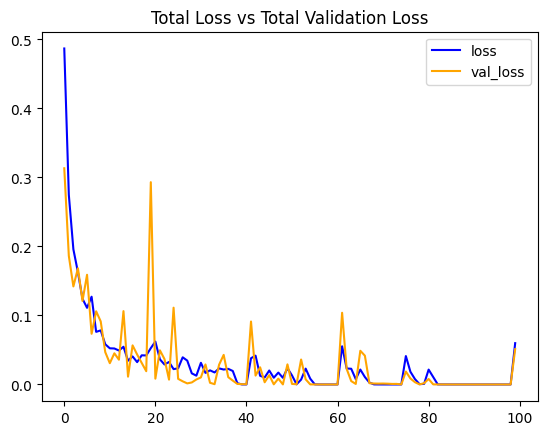

In [14]:
plot_metric(history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

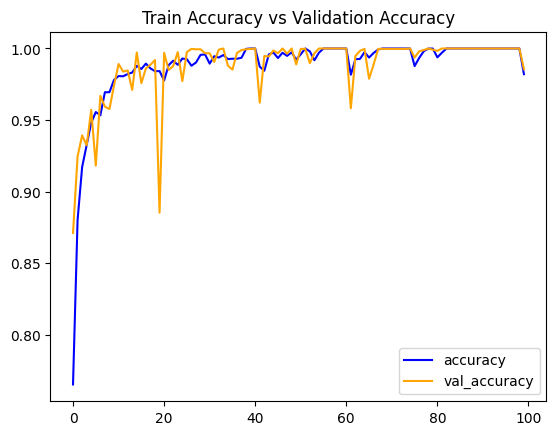

In [15]:
plot_metric(history, 'accuracy', 'val_accuracy', 'Train Accuracy vs Validation Accuracy')

In [16]:
model.save_weights('poseLSTM.weights.h5')